Line Detection Hough Transform | Ruchi Manikrao Dhore | W1652116

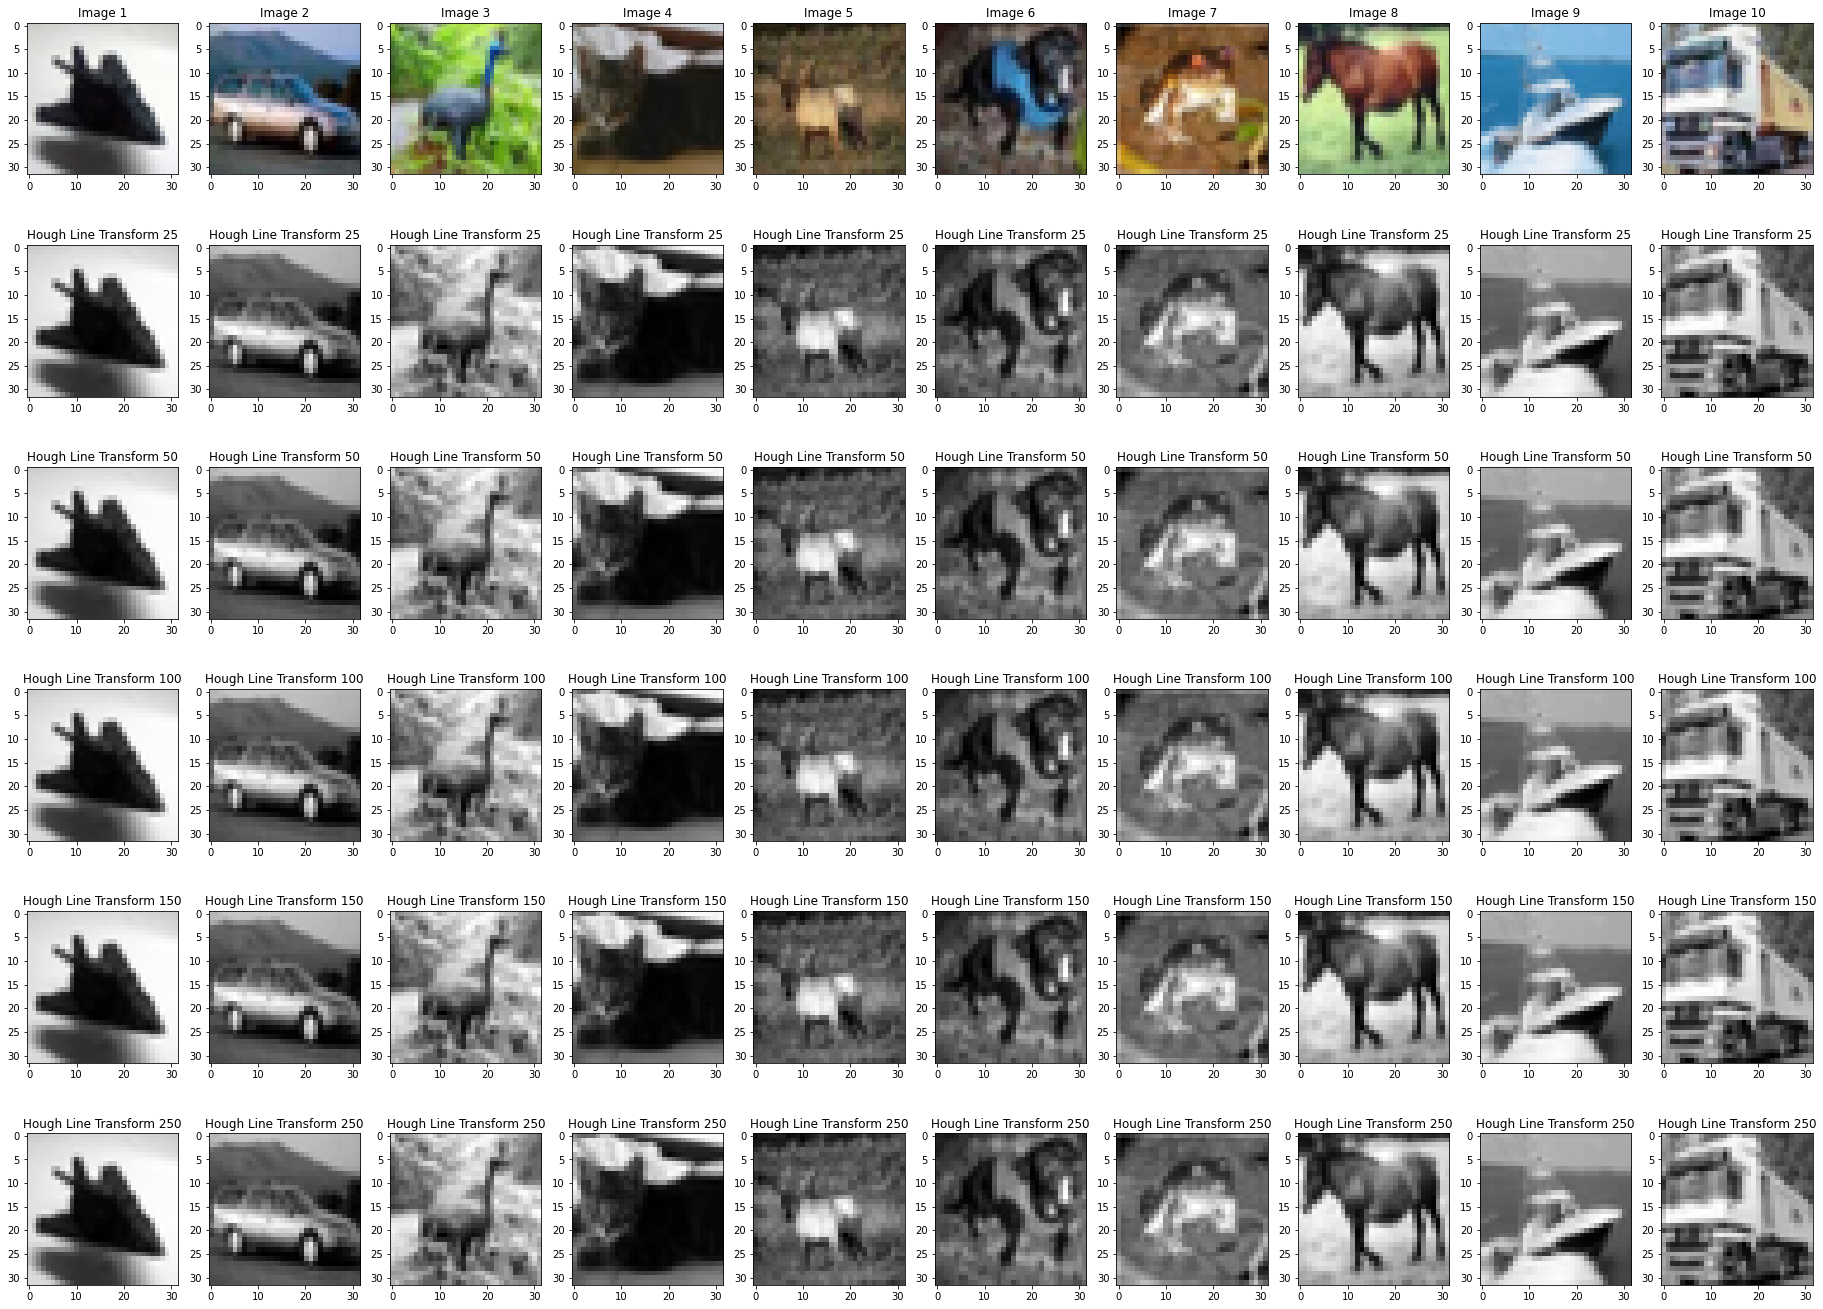

In [104]:
import math
import cv2 as cv
import numpy as np
from keras.datasets import cifar10
import matplotlib.pyplot as plt

input_range = 10

# To store images from cifar10 10 classes
input_image_dataset = []

# To load the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Set of different threshold values
line_threshold_values = [25, 50, 100, 150, 250]

# To get the first image from every class in the training set
for i in range(input_range):
  first_image_index = next((index for index, label in enumerate(y_train) if label[0] == i), None)
  input_image_dataset.append(x_train[first_image_index])

# To plot original images
figure = plt.figure(figsize = (32, 32))
figure.tight_layout()

for i in range(input_range):
  plt.subplot(8, 10, i + 1)
  plt.imshow(input_image_dataset[i])
  plt.title("Image " + str(i + 1))

# Hough Line Transform
for i, image in enumerate(input_image_dataset):
    # To convert the image to grayscale
    gray_image = cv.cvtColor(image, cv.COLOR_RGB2GRAY)

    # First, we need an edge image which can be obtained by applying an edge detection algorithm
    # Taking high threshold 3 times the lower threshold
    canny_edges = cv.Canny(gray_image, 70, 210, None, 3)

    index = 1
    # To iterate over the threshold values
    for threshold in line_threshold_values:
        # Apply Hough Line Transform
        lines = cv.HoughLines(canny_edges, lines=1, rho=np.pi/180, theta=150, threshold=threshold, srn=0, stn=0)

        # Check if lines are detected
        if lines is not None:
            for r in range(0, len(lines)):
                rho = lines[r][0][0]
                theta = lines[r][0][1]
                a = math.cos(theta)
                b = math.sin(theta)
                x0 = a * rho
                y0 = b * rho
                pt1 = (int(x0 + 1000*(-b)), int(y0 + 1000*(a)))
                pt2 = (int(x0 - 1000*(-b)), int(y0 - 1000*(a)))
                cv.line(gray_image, pt1, pt2, (0,0,255), 3, cv.LINE_AA)

        plot_index = ((index * 10) + 1) + i
        plt.subplot(8, 10, plot_index)
        plt.imshow(gray_image, cmap = 'gray')
        plt.title("Hough Line Transform {}".format(threshold))
        index = index + 1

Circle Detection Hough Transform | Ruchi Manikrao Dhore | W1652116

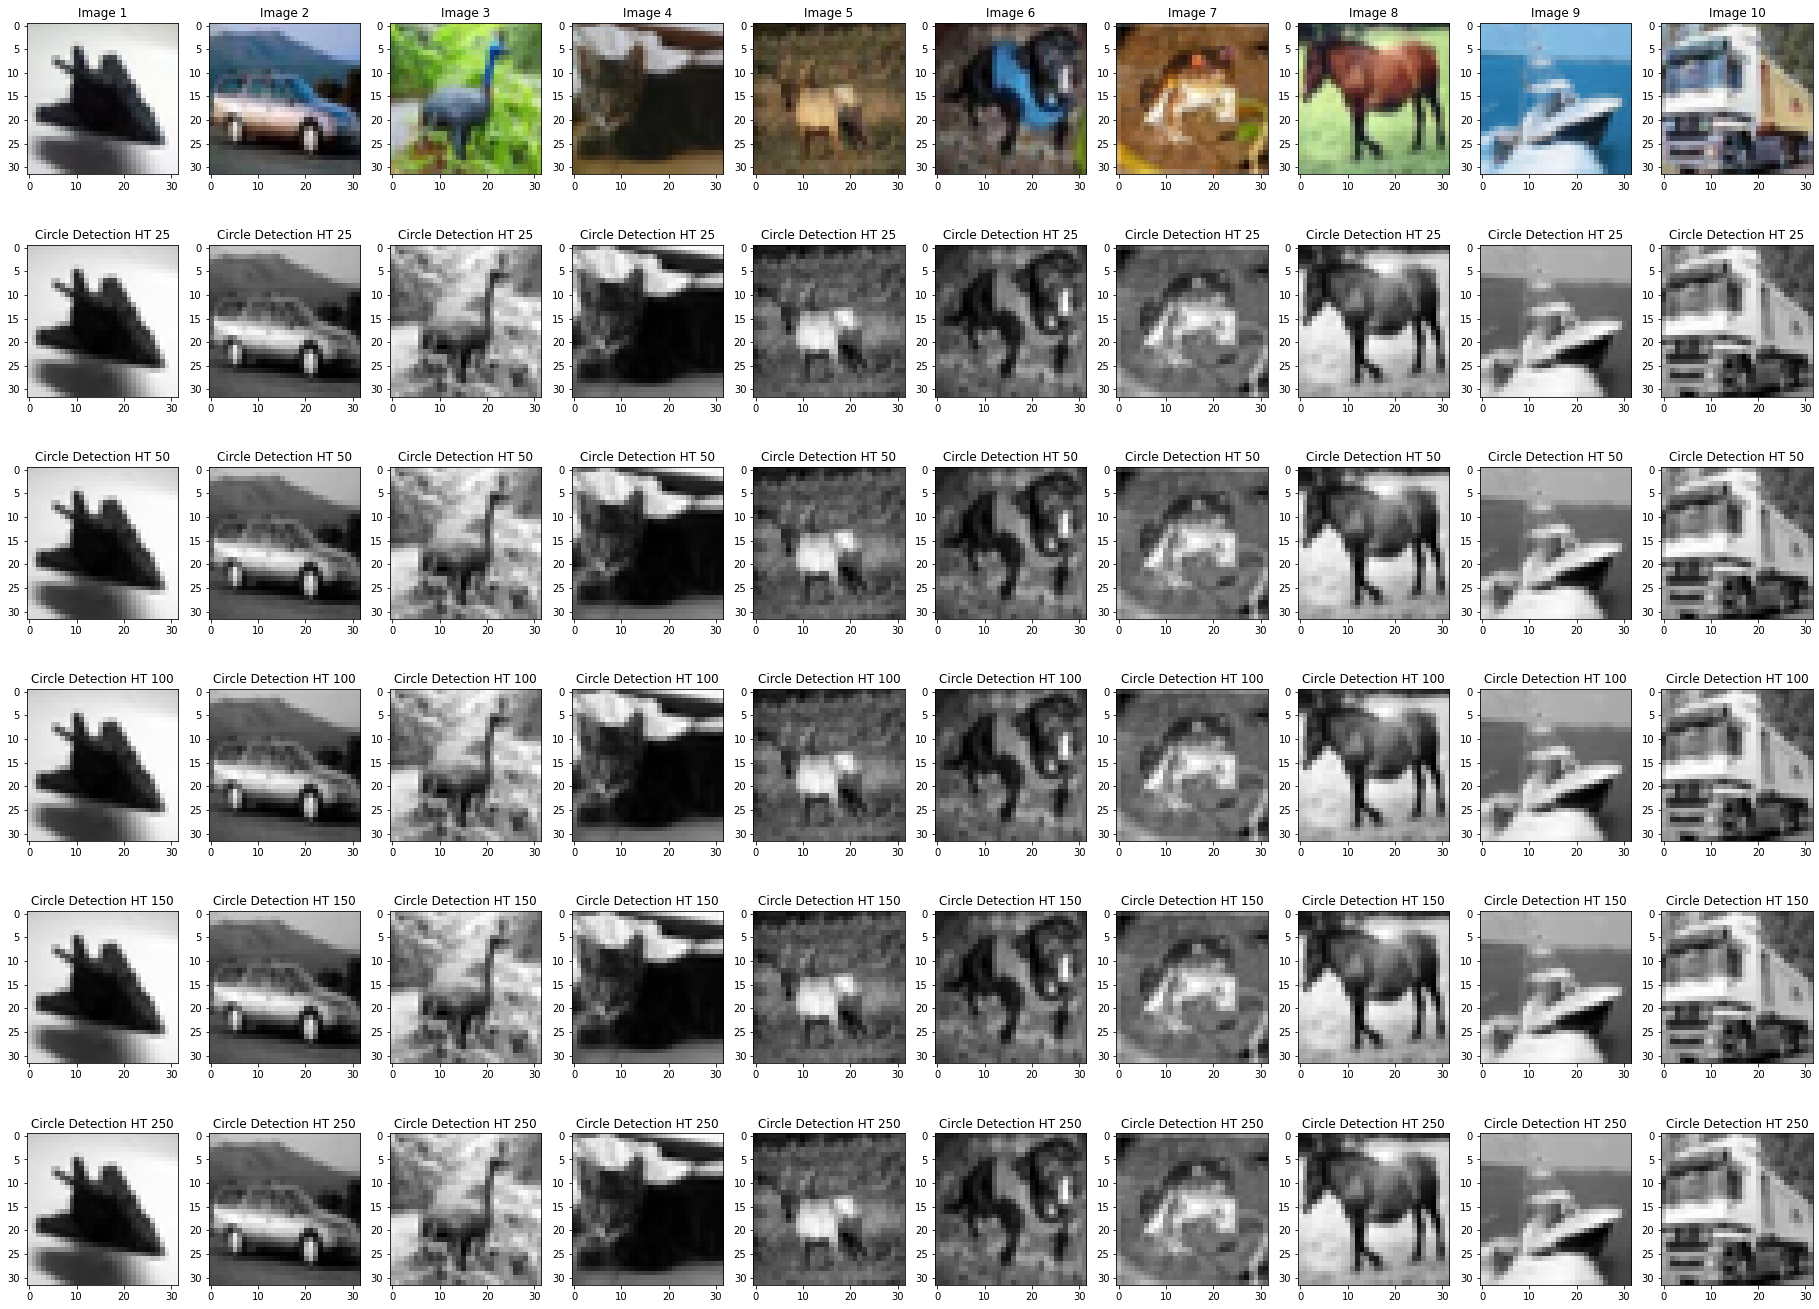

In [82]:
circle_threshold_values = [25, 50, 100, 150, 250]

# To plot original images
figure = plt.figure(figsize = (32, 32))
figure.tight_layout()

for i in range(input_range):
  plt.subplot(8, 10, i + 1)
  plt.imshow(input_image_dataset[i])
  plt.title("Image " + str(i+1))

# Circle Detection Hough Transform
for i, image in enumerate(input_image_dataset):
    # To convert the image to grayscale
    gray_image = cv.cvtColor(image, cv.COLOR_RGB2GRAY)

    # To iterate over the threshold values
    index = 1
    for threshold in circle_threshold_values:
        # Apply Circle Detection Hough Transform
        circles = cv.HoughCircles(gray_image, cv.HOUGH_GRADIENT, dp=1, minDist=20, param1=threshold, param2=30, minRadius=0, maxRadius=0)

        # Check if circles are detected
        if circles is not None:
            circles = np.round(circles[0, :]).astype("int")
            for i in circles[0,:]:
                # To draw the outer circle
                cv.circle(gray_image, (i[0], i[1]), i[2], (0,255,0), 2)
                # To draw the center of the circle
                cv.circle(gray_image, (i[0], i[1]), 2, (0,0,255), 3)

        plot_index = ((index * 10) + 1) + i
        plt.subplot(8, 10, plot_index)
        plt.imshow(gray_image, cmap = 'gray')
        plt.title("Circle Detection HT {}".format(threshold))
        index = index + 1
